<h1> COVID-19 STUDIES DATA ANALYSIS. </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'/Users/briangor/Downloads/Covid 19-studies.csv')
df

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT04614025,Open-label Multicenter Study to Evaluate the E...,https://clinicaltrials.gov/study/NCT04614025,NaN,ACTIVE_NOT_RECRUITING,This clinical trial will examine if a new trea...,NO,COVID|ARDS,BIOLOGICAL: PLX-PAD,"Number of ventilator-free days, 28 days",...,Allocation: RANDOMIZED|Intervention Model: PAR...,PLX-COV-03,2020-10-19,2021-08-04,2023-01,2020-11-03,NaN,2022-12-21,"Charite Campus Virchow, Berlin, 10117, Germany...",NaN
1,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
2,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
3,NCT04996225,Effect of Aerobics and Balancing Exercises on ...,https://clinicaltrials.gov/study/NCT04996225,NaN,COMPLETED,The recently emerged coronavirus named Severe ...,NO,Corona Virus Infection,"OTHER: Aerobics exercises, Balance exercises","SPSS for Windows, version 22 (SPSS Inc., Chica...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,"A,B E COVID 19",2021-08-01,2022-10-25,2023-02-10,2021-08-09,NaN,2023-02-22,"Ahmed.Assem, Sohag, 82951, Egypt",NaN
4,NCT04858425,Safety and Efficacy of Niclosamide in Patients...,https://clinicaltrials.gov/study/NCT04858425,RESERVOIR,ACTIVE_NOT_RECRUITING,"This is a 2-part, 2-arm, Phase 2 , multicentre...",NO,Covid19,DRUG: Niclosamide|DRUG: Placebo,"SAEs, Serious adverse event (SAE) coded by Sys...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,AZ-NICL-COV-1,2021-04-30,2022-06-04,2023-05,2021-04-26,NaN,2023-04-06,"Central Alabama Research, Birmingham, Alabama,...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337,NCT05137535,A Study of the Infection and Transmission of S...,https://clinicaltrials.gov/study/NCT05137535,NaN,RECRUITING,"Covid-19 disease, originated by SARS-Cov-2 Cor...",NO,Covid19,OTHER: Questionnaire,"Natural history, Description of the natural hi...",...,Observational Model: |Time Perspective: p,PLS COVID 19 - Prog. 3401CESC,2021-11-03,2021-12-31,2022-06-30,2021-11-30,NaN,2021-11-30,"AULSS 5 Polesana, Rovigo, RO, Italy",NaN
9338,NCT05669235,Differences Between Women With COVID-19 and Lo...,https://clinicaltrials.gov/study/NCT05669235,NaN,RECRUITING,The coronavirus disease of 2019 (COVID-19) has...,NO,COVID-19,DIAGNOSTIC_TEST: Questionnaires,"Fatigue Assessment Scale, Scale that measures ...",...,Observational Model: |Time Perspective: p,OBS_LCOVID,2022-12-29,2023-02-28,2023-06-30,2022-12-30,NaN,2023-01-04,"University of Valencia, Valencia, 46010, Spain",NaN
9339,NCT05584735,Determining the Relationship Between Gut Micro...,https://clinicaltrials.gov/study/NCT05584735,NaN,NOT_YET_RECRUITING,This study will evaluate the effect of the mic...,NO,Inflammatory Bowel Diseases,BIOLOGICAL: Influenza vaccine|BIOLOGICAL: COVI...,"Influenza or COVID-17 antibody concentrations,...",...,Observational Model: |Time Perspective: p,2021-0977|A534250|SMPH/MEDICINE/GASTROE

In [3]:
df.shape

(9342, 30)

In [4]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NCT Number                  9342 non-null   object 
 1   Study Title                 9342 non-null   object 
 2   Study URL                   9342 non-null   object 
 3   Acronym                     3610 non-null   object 
 4   Study Status                9342 non-null   object 
 5   Brief Summary               9342 non-null   object 
 6   Study Results               9342 non-null   object 
 7   Conditions                  9342 non-null   object 
 8   Interventions               7992 non-null   object 
 9   Primary Outcome Measures    9304 non-null   object 
 10  Secondary Outcome Measures  6822 non-null   object 
 11  Other Outcome Measures      926 non-null    object 
 12  Sponsor                     9342 non-null   object 
 13  Collaborators               3273 

According to research, we cannot delete the missing values since the missing values in research are also important data times.

<h2> Number of Covid-19 studies over time. </h2>
This is to analyze how the studies of covid-19 have changed over time

1998.0       1
2007.0       1
2009.0       1
2011.0       1
2012.0       2
2013.0       3
2014.0       4
2015.0       4
2016.0      11
2017.0      12
2018.0      13
2019.0      58
2020.0    4631
2021.0    2679
2022.0    1273
2023.0     595
2024.0      15
2025.0       1
Name: Start Date, dtype: int64


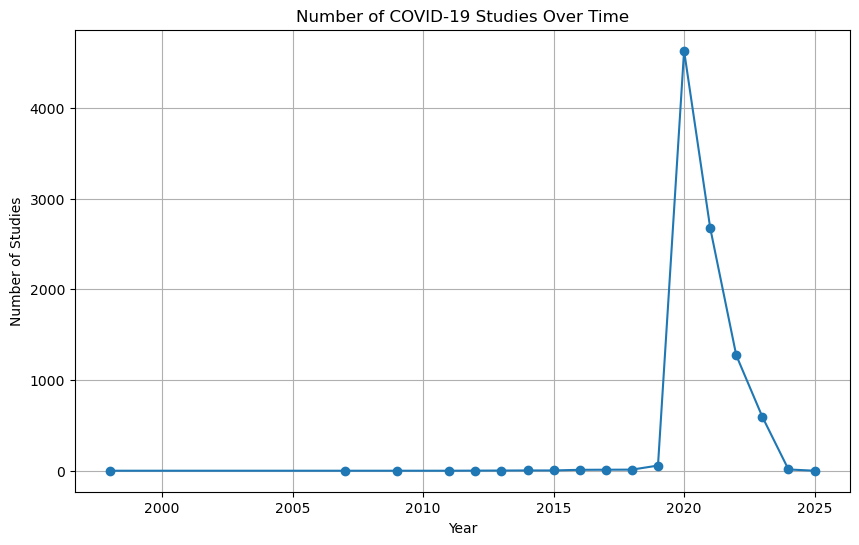

In [7]:
# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extract year from 'Start Date' and count studies per year
studies_per_year = df['Start Date'].dt.year.value_counts().sort_index()
print(studies_per_year)

# Plot the number of studies over time
plt.figure(figsize=(10, 6))
plt.plot(studies_per_year.index, studies_per_year.values, marker='o', linestyle='-')
plt.title('Number of COVID-19 Studies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.show()

According to the line graph above, the **studies of Covid-19 began as early as 1998** but more studies surfaced in **2020 when it was a global pandemic**. It seems to be decreasing, and does that mean it has ended, we'll never know.

<h2> Distribution of Covid-19 phases </h2>

PHASE2           1021
PHASE3            720
PHASE1            448
PHASE2|PHASE3     313
PHASE1|PHASE2     284
PHASE4            283
EARLY_PHASE1       69
Name: Phases, dtype: int64


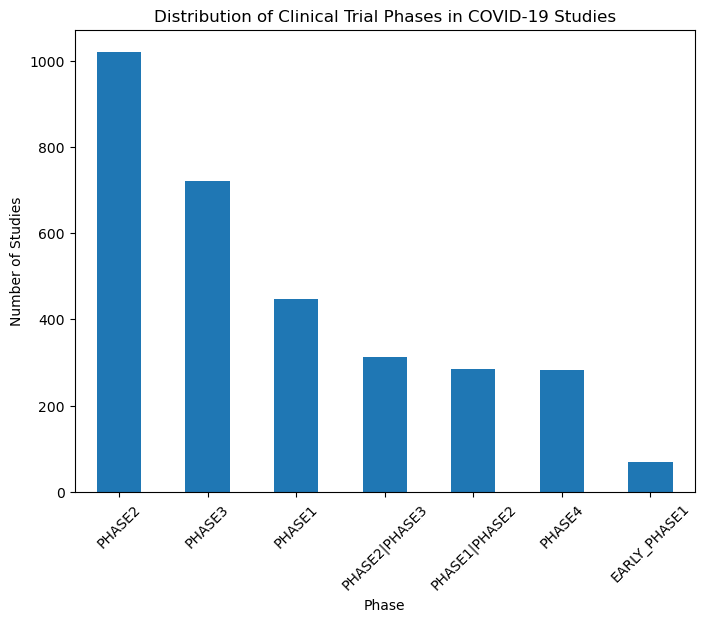

In [8]:
# Count the number of studies in each phase
phase_distribution = df['Phases'].value_counts()
print(phase_distribution)

# Plot a bar chart for phase distribution
plt.figure(figsize=(8, 6))
phase_distribution.plot(kind='bar')
plt.title('Distribution of Clinical Trial Phases in COVID-19 Studies')
plt.xlabel('Phase')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()


Clinical trials typically progress through different phases to assess the safety and efficacy of potential treatments.
- **Phase I**: These **448 trials are the first step** in testing a new treatment in humans. They focus on safety, dosage, and side effects.
- **Phase II**: Phase II trials involve a larger group of patients **as there are 1021 clinical trials** and assess the treatment's effectiveness and side effects.
- **Phase III**: These trials are larger and involve more participants (**720**). They evaluate the treatment's effectiveness compared to existing standard treatments and monitor side effects.
- **Phase IV**: Phase IV trials occur after a treatment has been approved and is in widespread use. They continue to monitor its safety and efficacy in real-world settings
- **Combination of Phase II and III**: **313 clinical trials**, this suggests a focus on both efficiency and safety aspects in these trials.
- **Combination of phase I and II**: **284 clinical trials that include both** Phase I and Phase II. These trials likely assess the safety and dosage as well as preliminary effectiveness.
- **Early Phase I**: The **69 clinical trials** in these category, are the very early in the development process and focus on the safety and initial testing of potential treatments.


**Explanation**
- The distribution of COVID-19 clinical trials across different phases indicates a comprehensive approach to research and development. Phase II and Phase III trials, with a significant number of studies, suggest a focus on both preliminary safety and efficacy assessment as well as large-scale effectiveness testing.

- The presence of combined phases (PHASE2|PHASE3 and PHASE1|PHASE2) suggests a thorough investigation of treatments, considering multiple aspects of development.

- Phase IV trials reflect the continued monitoring of treatments after approval, ensuring their safety and effectiveness in real-world use.

- The presence of "Early Phase I" trials indicates a commitment to early-stage safety testing and dosage evaluation. This phase distribution reflects the complexity and diversity of research efforts in response to the COVID-19 pandemic. It signifies a multi-phase approach to understanding and addressing the disease.

- As the research landscape evolves and more data becomes available, the phase distribution may change, potentially reflecting advancements in COVID-19 research and the development of new treatments and vaccines.

<h2> Common Covid-19 Conditions. </h2>

COVID-19                  2699
Covid19                   2003
COVID                      322
SARS-CoV-2                 237
Corona Virus Infection     228
Covid-19                   224
SARS-CoV-2 Infection       218
COVID-19 Pneumonia         203
Coronavirus                201
Coronavirus Infection      193
Name: Conditions, dtype: int64


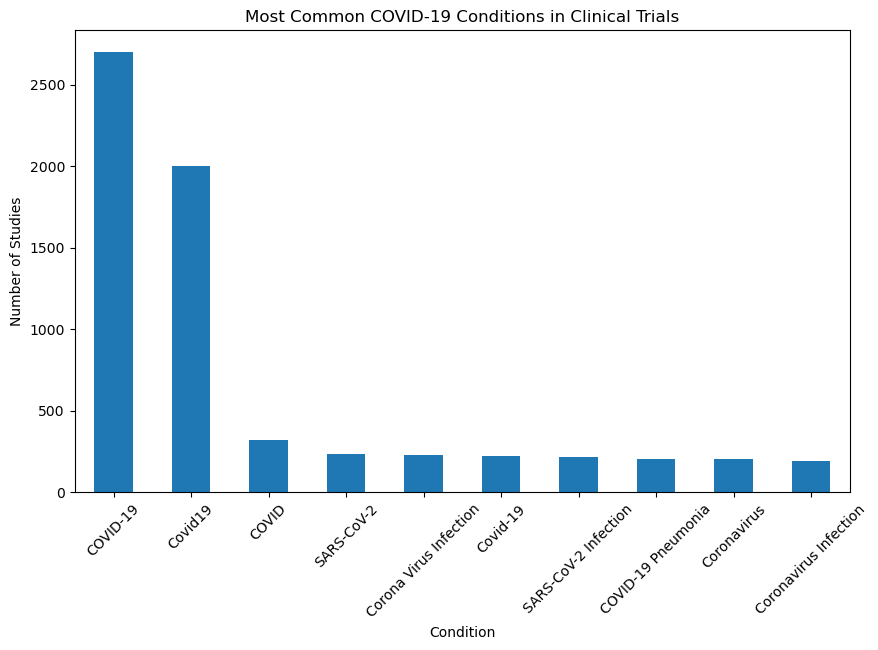

In [9]:
# Count the occurrences of each COVID-19 condition
common_conditions = df['Conditions'].str.split('|').explode().str.strip().value_counts().head(10)
print(common_conditions)

# Plot a bar chart for common COVID-19 conditions
plt.figure(figsize=(10, 6))
common_conditions.plot(kind='bar')
plt.title('Most Common COVID-19 Conditions in Clinical Trials')
plt.xlabel('Condition')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()


- **COVID-19 (2699)**: The most frequently mentioned condition in COVID-19 clinical trials is "COVID-19" itself, with 2,699 trials focusing directly on the disease. This indicates a substantial emphasis on researching the virus and its effects.

- **Covid19 (2003)**: "Covid19" is the second most common condition mentioned in clinical trials, with 2,003 trials. It is synonymous with COVID-19 and underscores the various ways the condition is referred to in studies.

- **COVID (322)**: "COVID" is a more concise term used in 322 trials, further emphasizing the focus on the disease in different forms.

- **SARS-CoV-2 (237**): "SARS-CoV-2" refers to the virus responsible for COVID-19, and it is the focus of 237 trials. These trials might be exploring aspects related to the virus itself.

- **Corona Virus Infection (228)**: This condition, mentioned in 228 trials, is a broader term used to encompass various aspects of coronavirus infections, including COVID-19.

- **Covid-19 (224)**: This term is another variation of "COVID-19" mentioned in 224 trials, highlighting the diversity in naming the condition.

- **SARS-CoV-2 Infection (218)**: Similar to "SARS-CoV-2," this condition focuses on the viral infection and is mentioned in 218 trials.

- **COVID-19 Pneumonia (203)**: This condition specifies a subset of COVID-19 cases related to pneumonia and is the focus of 203 trials, reflecting a focus on respiratory aspects.

- **Coronavirus (201)**: "Coronavirus" is a more general term used in 201 trials, encompassing the broader family of viruses to which SARS-CoV-2 belongs.

- **Coronavirus Infection (193)**: Similar to "Coronavirus," this term describes the infection caused by coronavirus and is mentioned in 193 trials.

# Analysis:

- The bar chart illustrates the diversity in naming conventions and terminology used in COVID-19 clinical trials. Researchers employ different terms to describe the same condition, which can lead to variability in trial descriptions.

- The overwhelming focus on "COVID-19" and its synonyms (e.g., "Covid19" and "COVID") highlights the critical importance of researching the virus and understanding its impact on human health.

- The presence of other conditions like "SARS-CoV-2" and "Corona Virus Infection" suggests a comprehensive approach to studying COVID-19, encompassing virological and clinical aspects.

- The variety of conditions reflects the complexity of the disease and the multidisciplinary nature of COVID-19 research.

- Researchers and healthcare professionals should be aware of the diverse terminology used in the field to ensure clarity and consistency in reporting and communication.

<h2> Geographic Distribution of Trials </h2>

Massachusetts General Hospital, Boston, Massachusetts, 02114, United States                35
National Institutes of Health Clinical Center, Bethesda, Maryland, 20892, United States    34
Brigham and Women's Hospital, Boston, Massachusetts, 02115, United States                  32
University of Minnesota, Minneapolis, Minnesota, 55455, United States                      31
Temple University Hospital, Philadelphia, Pennsylvania, 19140, United States               31
                                                                                           ..
H. de Mataro, Mataró, Spain                                                                 1
H. Costa del Sol, Marbella, Spain                                                           1
H. Univ. Rey Juan Carlos, Madrid, Spain                                                     1
H. Univ. Ramón y Cajal, Madrid, Spain                                                       1
Ospedale Policlinico San Martino IRCCS, Genova, 16132, Italy

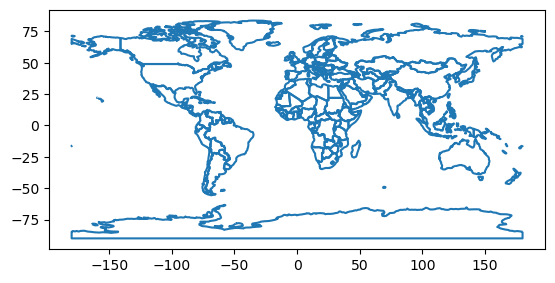

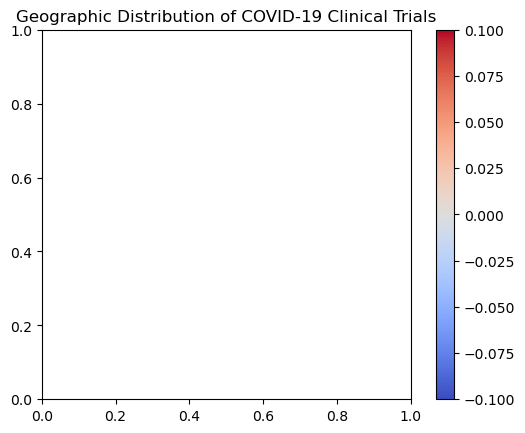

In [17]:
import geopandas as gpd # For geographic distribution

# Load a world map shapefile for geographical visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Count the number of trials by location
location_counts = df['Locations'].str.split('|').explode().str.strip().value_counts()
print(location_counts)

# Merge the location counts with the world map
world['Trial_Count'] = world['name'].map(location_counts)

# Create a geographical heatmap
world.boundary.plot()
world.plot(column='Trial_Count', cmap='coolwarm', legend=True)
plt.title('Geographic Distribution of COVID-19 Clinical Trials')
plt.show()


<h2> Study Types and Designs </h2>

INTERVENTIONAL     5377
OBSERVATIONAL      3928
EXPANDED_ACCESS      37
Name: Study Type, dtype: int64


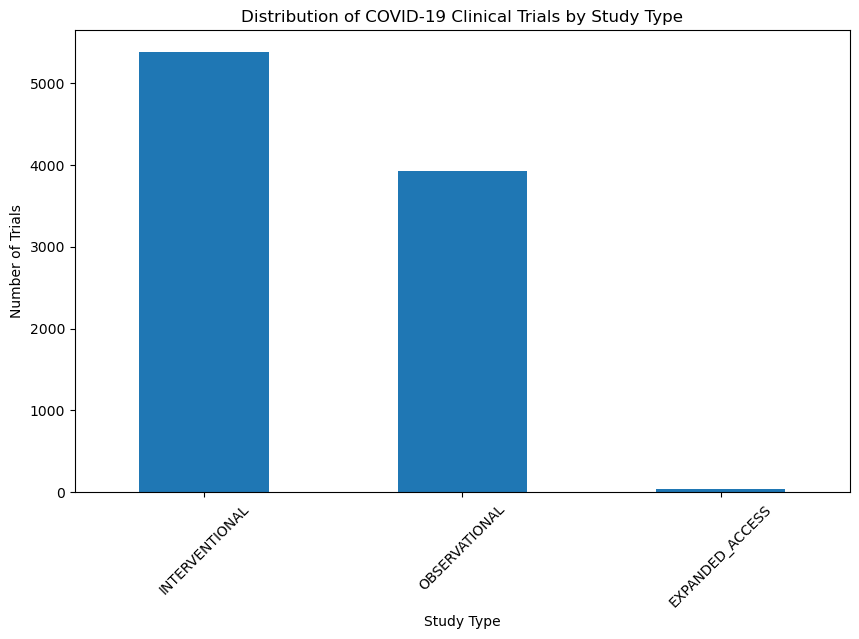

In [11]:
# Count the number of trials by study type
study_type_counts = df['Study Type'].value_counts()
print(study_type_counts)

# Plot a bar chart for study type distribution
plt.figure(figsize=(10, 6))
study_type_counts.plot(kind='bar')
plt.title('Distribution of COVID-19 Clinical Trials by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()


This analysis demonstrates the diversity of study types and designs in COVID-19 research, reflecting the comprehensive approach to combating the pandemic. Researchers are exploring various avenues, from experimental treatments to observational data analysis and compassionate use of experimental therapies.

## Analysis:

- **INTERVENTIONAL (5377)**: The majority of COVID-19 clinical trials fall under the "INTERVENTIONAL" category, indicating a significant focus on trials involving experimental treatments, interventions, and therapies. This emphasizes the extensive efforts to develop and test potential COVID-19 treatments and vaccines.

- **OBSERVATIONAL (3928)**: "OBSERVATIONAL" trials represent a substantial portion of COVID-19 research. These trials involve the collection and analysis of data from participants without intervening in their treatment. Observational studies are important for understanding the natural course of the disease and identifying potential risk factors.

- **EXPANDED_ACCESS (37)**: "EXPANDED_ACCESS" trials are less common, indicating a limited focus on providing experimental treatments to patients who do not qualify for traditional clinical trials. These trials may serve as a means to offer promising treatments to individuals with severe COVID-19 cases.

## Interpretation:

The analysis of study types and designs in COVID-19 clinical trials provides insights into the research approach:

- The prevalence of "INTERVENTIONAL" trials underscores the urgency and intensity of efforts to develop effective treatments and vaccines for COVID-19.

- "OBSERVATIONAL" trials play a crucial role in understanding the disease's progression, identifying risk factors, and assessing the impact of interventions without experimental interference.

- The presence of "EXPANDED_ACCESS" trials indicates a willingness to offer experimental treatments to individuals who may not meet the criteria for traditional clinical trials, potentially providing access to potentially life-saving therapies.


<h2> Distribution of Age Groups. </h2>

ADULT, OLDER_ADULT           6879
CHILD, ADULT, OLDER_ADULT    1277
ADULT                         718
CHILD                         185
CHILD, ADULT                  177
OLDER_ADULT                   106
Name: Age, dtype: int64


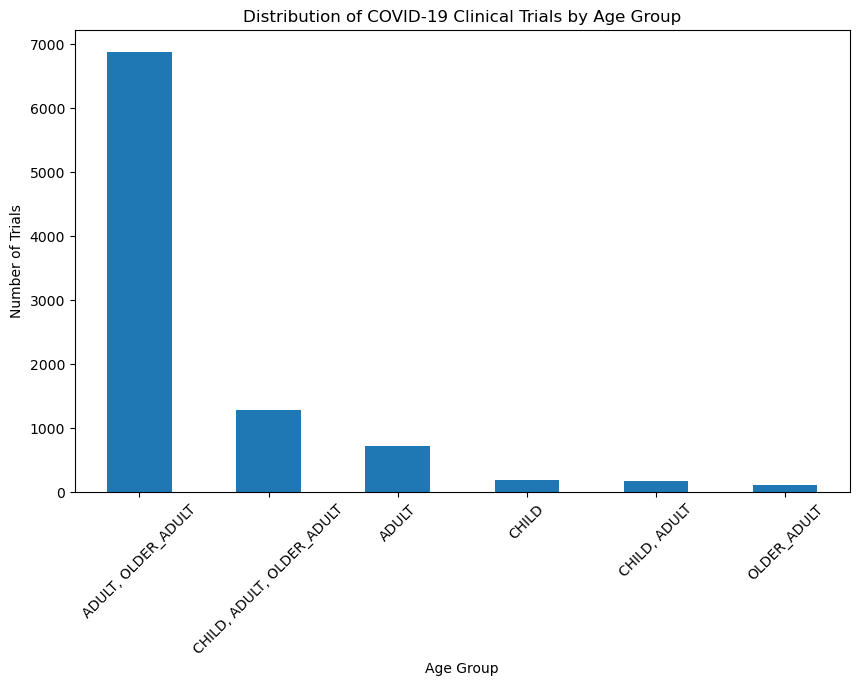

In [13]:
# Count the number of trials by age group
age_group_counts = df['Age'].value_counts()
print(age_group_counts)

# Plot a bar chart for age group distribution
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Distribution of COVID-19 Clinical Trials by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()


**The analysis of age group distributions in COVID-19 clinical trials reveals the following:**

1. Researchers are actively studying the impact of COVID-19 on a wide range of age groups, including adults, older adults, and children.

2. The most common age group combination is **"ADULT, OLDER_ADULT,"** reflecting the focus on middle-aged and elderly populations, which are known to be **more vulnerable to severe COVID-19 outcomes**.

3. Trials that include **"CHILD" populations** demonstrate a commitment to understanding the disease's effects on **pediatric populations**.

4. The presence of various age group combinations underscores the multi-generational approach to studying COVID-19.

**This analysis highlights the diversity in age group inclusion in COVID-19 clinical trials and the importance of studying the disease's impact across different age categories. It also reflects the effort to develop treatments and vaccines that are effective for diverse age groups.**

<h2> Clinical Trial Duration </h2>

Trial Duration


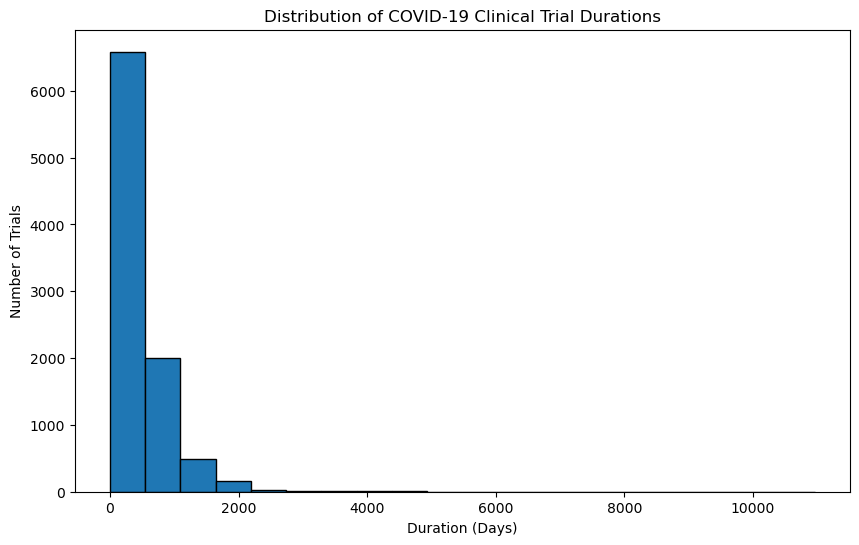

In [19]:
# Ensure that 'Start Date' and 'Completion Date' are in datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Completion Date'] = pd.to_datetime(df['Completion Date'])

# Calculate the trial duration in days
df['Trial Duration'] = (df['Completion Date'] - df['Start Date']).dt.days
print('Trial Duration')

# Plot a histogram for trial duration
plt.figure(figsize=(10, 6))
plt.hist(df['Trial Duration'], bins=20, edgecolor='k')
plt.title('Distribution of COVID-19 Clinical Trial Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Trials')
plt.show()


<h2> Collaboration Networks. </h2>

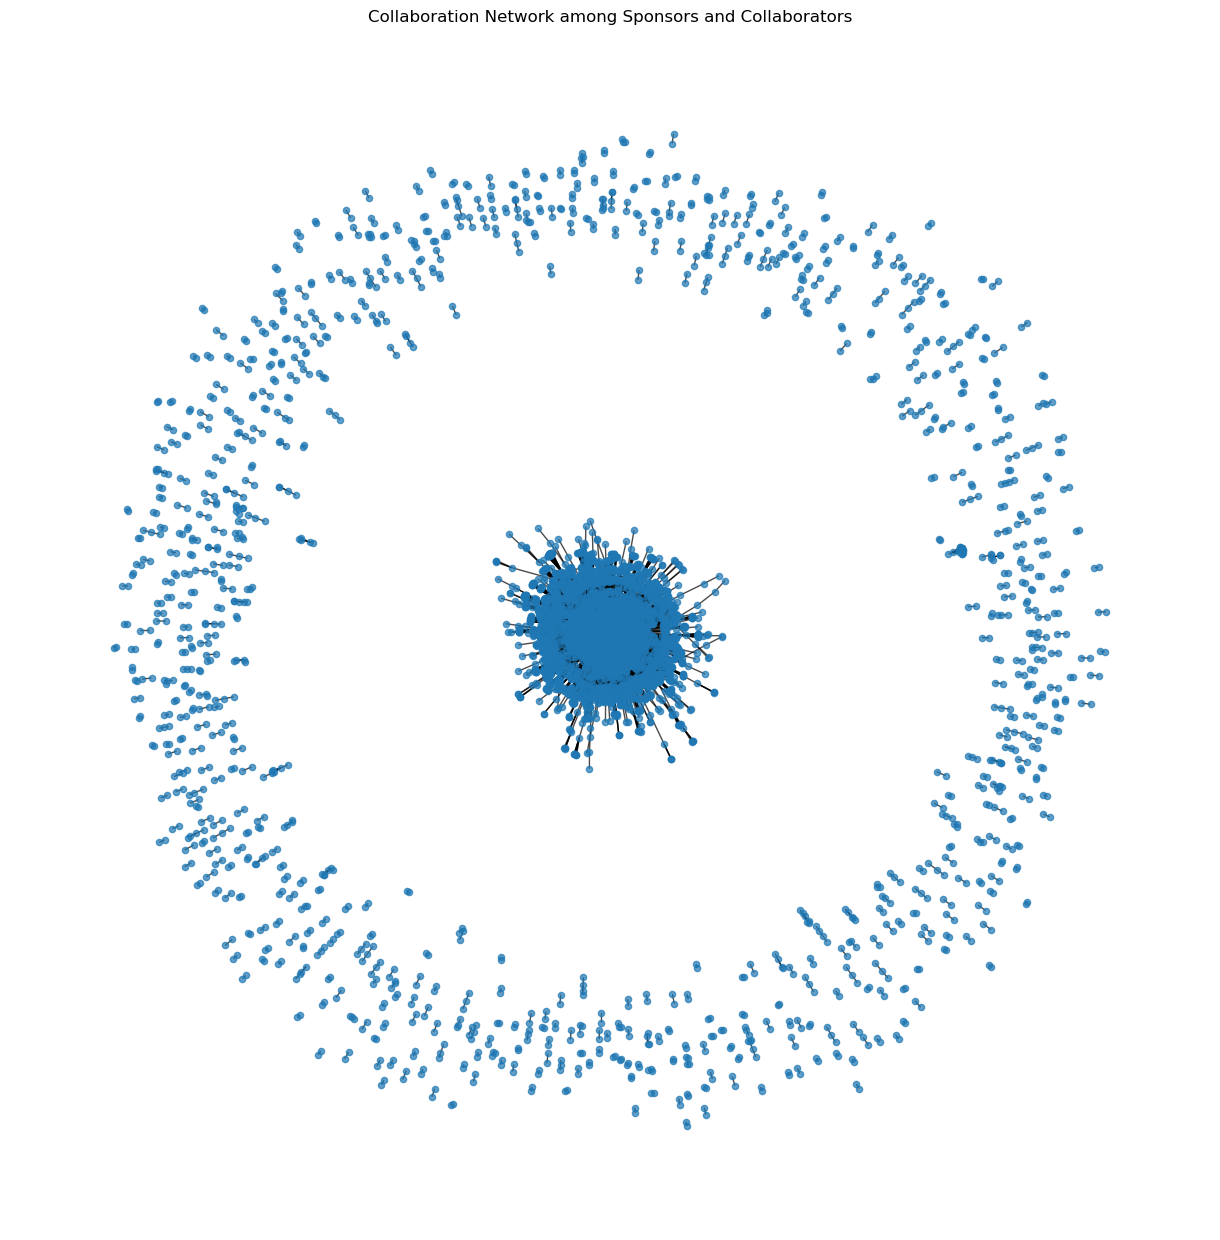

In [15]:
import networkx as nx

# Create a graph for collaboration networks
G = nx.Graph()

# Add edges (collaborations) between sponsors and collaborators
edges = [(row['Sponsor'], row['Collaborators']) for _, row in df.iterrows()]
G.add_edges_from(edges)

# Visualize the collaboration network
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_size=20, with_labels=False, alpha=0.7)
plt.title('Collaboration Network among Sponsors and Collaborators')
plt.show()


In [26]:
# Collaborators Analysis
# Count the number of studies involving each collaborator
collaborators=df['Collaborators'].str.split('|').explode().str.strip().value_counts().head(10)
print(collaborators)

Canadian Institutes of Health Research (CIHR)                        38
National Institutes of Health (NIH)                                  37
National Institute of Allergy and Infectious Diseases (NIAID)        34
National Cancer Institute (NCI)                                      34
Pfizer                                                               33
National Heart, Lung, and Blood Institute (NHLBI)                    24
Institut National de la Santé Et de la Recherche Médicale, France    24
Bill and Melinda Gates Foundation                                    22
Coalition for Epidemic Preparedness Innovations                      22
Karolinska Institutet                                                22
Name: Collaborators, dtype: int64


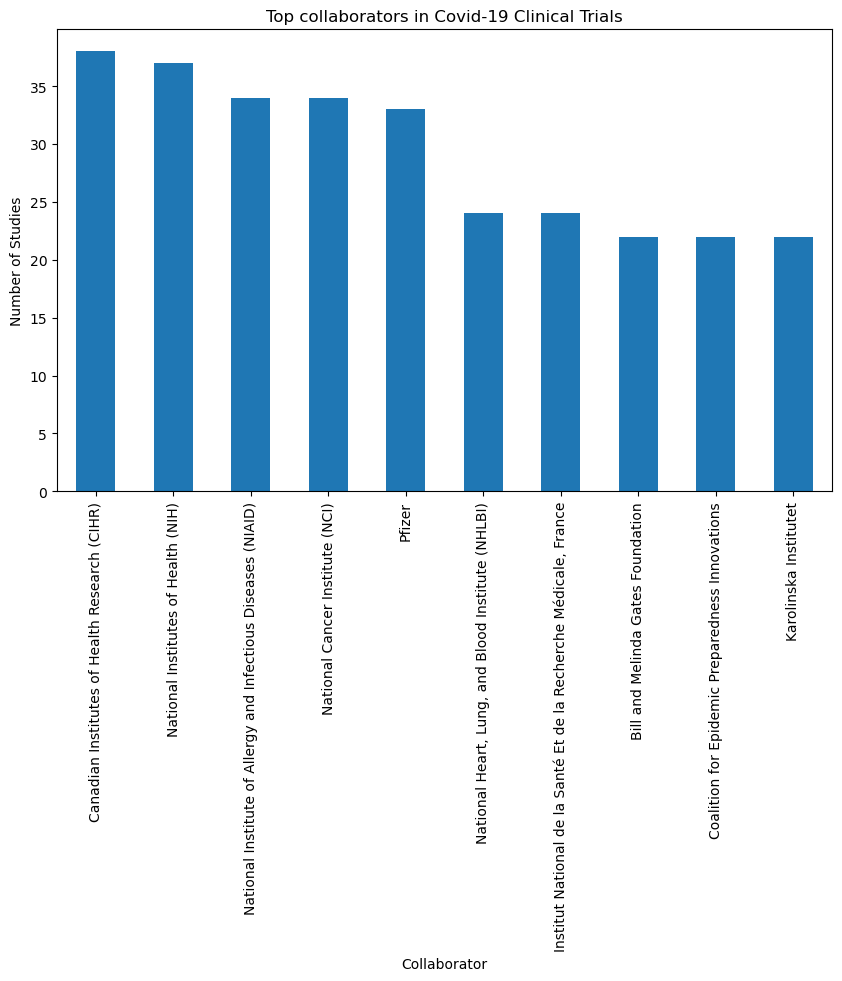

In [28]:
# Plot a bar chart for top collaborators
plt.figure(figsize=(10,6))
collaborators.plot(kind='bar')
plt.title('Top collaborators in Covid-19 Clinical Tribals')
plt.xlabel('Collaborator')
plt.ylabel('Number of Studies')
#plt.xticks(rotation=45)
plt.show()

### Analysis:

- **Canadian Institutes of Health Research (CIHR) and National Institutes of Health (NIH**): These two organizations are the leading collaborators in COVID-19 studies, with 38 and 37 collaborations, respectively.

- *8National Institute of Allergy and Infectious Diseases (NIAID) and National Cancer Institute (NCI)**: These institutes have contributed significantly to collaborative research, each having 34 collaborations.

- **Pfizer**: The pharmaceutical company Pfizer is also a major collaborator with 33 collaborations.

- **National Heart, Lung, and Blood Institute (NHLBI), Institut National de la Santé Et de la Recherche Médicale (France), Bill and Melinda Gates Foundation, Coalition for Epidemic Preparedness Innovations, and Karolinska Institutet**: These organizations have collaborated actively with 22 collaborations each.

### Interpretation:

The analysis of top collaborators in COVID-19 studies reveals organizations and institutes that have played a prominent role in collaborative research efforts. These collaborations may involve joint research projects, funding support, or data sharing, indicating the importance of international and cross-disciplinary collaboration in addressing the COVID-19 pandemic. Understanding the top collaborators can help identify key research partners and collaborative networks in the field.

<h2> Intervention Types </h2>

In [23]:
# Count the occurrence of each intervention type
intervention_types=df['Interventions'].str.split('|').explode().str.strip().value_counts().head(10)
print(intervention_types)

DRUG: Placebo               538
OTHER: Placebo              253
BIOLOGICAL: Placebo         110
DRUG: Hydroxychloroquine    106
OTHER: No intervention       64
DRUG: Remdesivir             56
DRUG: Tocilizumab            47
DRUG: Ivermectin             46
OTHER: Questionnaire         43
DRUG: Azithromycin           39
Name: Interventions, dtype: int64


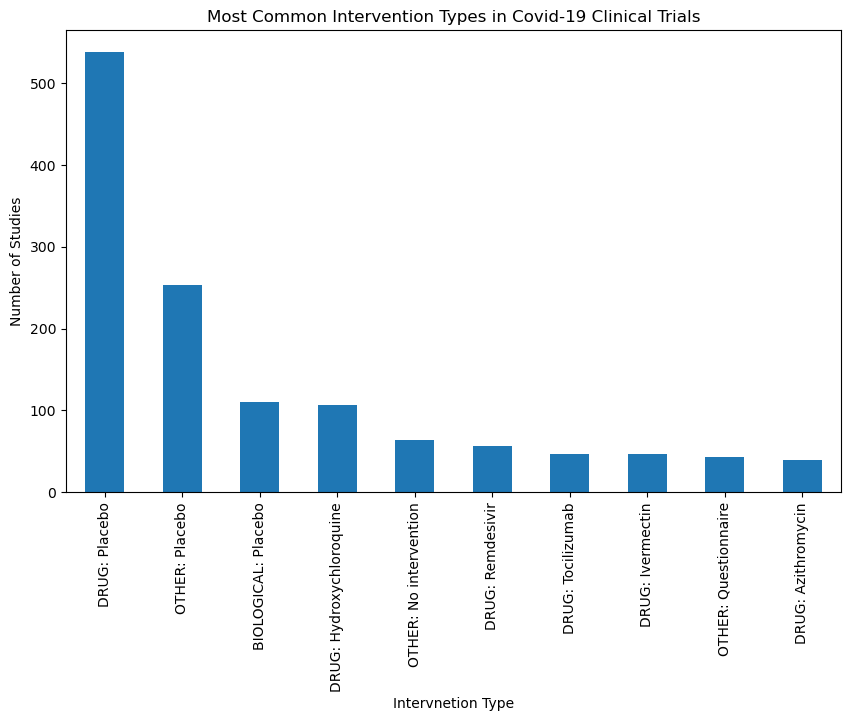

In [29]:
# Plot a bar chart for intervention types
plt.figure(figsize=(10,6))
intervention_types.plot(kind='bar')
plt.title('Most Common Intervention Types in Covid-19 Clinical Trials')
plt.xlabel('Intervnetion Type')
plt.ylabel('Number of Studies')
plt.show()

## Analysis
- DRUG Interventions: The most common interventions in COVID-19 clinical trials are related to drugs, with "DRUG: Placebo" having the highest count. This indicates a significant focus on testing pharmaceutical treatments.

- Placebo Comparisons: Placebo-controlled trials, including "DRUG: Placebo" and "OTHER: Placebo," are common. These trials typically involve comparing the effects of a drug against a placebo to assess its efficacy.

- BIOLOGICAL Interventions: "BIOLOGICAL: Placebo" suggests the use of biological therapies, often in comparison to placebos.

- Specific Drugs: Trials involving drugs like "Hydroxychloroquine," "Remdesivir," "Tocilizumab," and "Ivermectin" indicate an interest in assessing the efficacy of these specific treatments.

- No Intervention: "OTHER: No intervention" trials are less common but might focus on the natural progression of the disease without any specific treatment.

- Questionnaires: "OTHER: Questionnaire" trials may involve data collection and surveys rather than physical interventions.

### Interpretation
The analysis of intervention types reveals the diverse approaches taken in COVID-19 clinical trials. Researchers are exploring various treatment options, including pharmaceuticals and biological therapies, often comparing them to placebos. The presence of questionnaires indicates studies that collect data through surveys and questionnaires rather than medical interventions. This diversity in interventions reflects the complexity of COVID-19 research and the quest for effective treatments.

<h2> Sponsorship Analysis. </h2>

In [3]:
# Count the number of studies sponsored by each entity type
sponsorship_distribution=df['Sponsor'].value_counts()
print(sponsorship_distribution)

Assistance Publique - Hôpitaux de Paris                          136
Assiut University                                                113
University Hospital, Strasbourg, France                           57
Cairo University                                                  56
National Institute of Allergy and Infectious Diseases (NIAID)     54
                                                                ... 
Lancaster General Hospital                                         1
Seventh Medical Center of PLA General Hospital                     1
Enos Bernasconi                                                    1
Misr International University                                      1
Medialis Ltd.                                                      1
Name: Sponsor, Length: 3394, dtype: int64


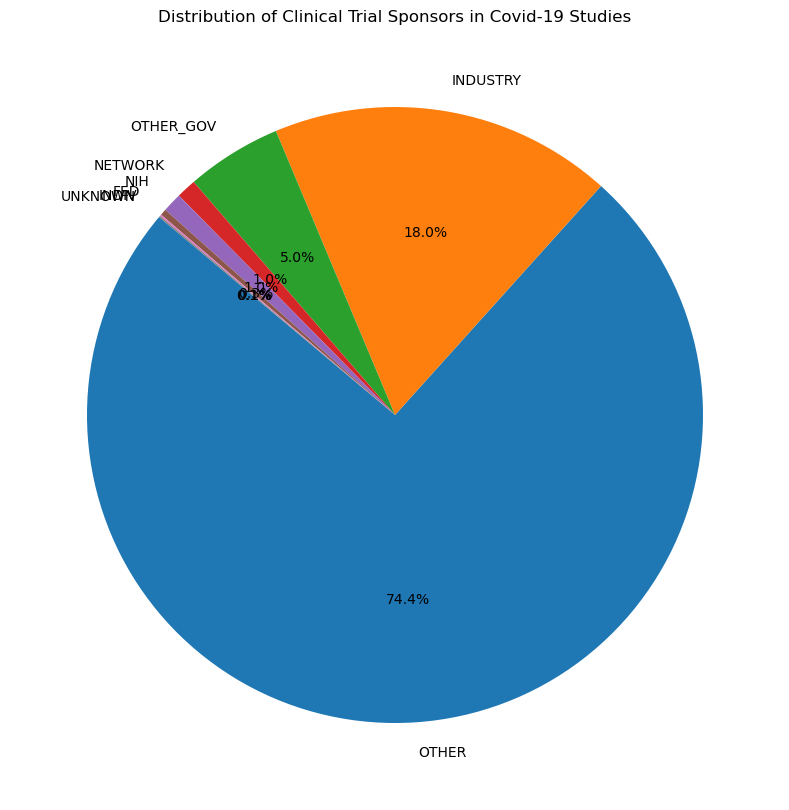

In [31]:
# Plotting a pie chart for sponshorship distribution
plt.figure(figsize=(15,10))
plt.pie(sponsorship_distribution, labels=sponsorship_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Clinical Trial Sponsors in Covid-19 Studies')
plt.show()

- **OTHER (6955)**: The majority of clinical trials are sponsored by entities falling into the "OTHER" category. This category **likely includes a wide range of sponsors, such as academic institutions, nonprofit organizations, and research institutions. The high count in this category suggests a diverse set of sponsors involved in COVID-19 research**.

- **INDUSTRY (1680)**: "INDUSTRY" sponsorship indicates that a significant number of trials receive **funding and support from pharmaceutical and biotech companies**. This is common in clinical trials for drug development, including vaccines and treatments for COVID-19.

- **OTHER_GOV (469)**: "OTHER_GOV" sponsorship represents clinical trials funded and supported by other government agencies beyond the National Institutes of Health (NIH). It might include **state or local government agencies or international health organizations**.

- **NETWORK (97)**: "NETWORK" sponsorship implies collaborative research efforts led by **research networks or consortia**. These trials are often conducted by multiple institutions working together.

- **NIH (95)**: The "NIH" is a major player in funding and sponsoring COVID-19 clinical trials. These trials are often conducted with **support from the U.S. National Institutes of Health, indicating significant government involvement**.

- **FED (31)**: "FED" sponsorship suggests **federal government involvement**, possibly from countries other than the United States. It represents international collaboration and funding from government entities.

- **INDIV (8)**: "INDIV" indicates **individual or private sponsorships**. These trials might be initiated and funded by individual researchers or private donors.

- **UNKNOWN (7)**: "UNKNOWN" sponsorship reflects a small number of trials with undisclosed or unclear sponsorship sources.

### Interpretation:

1. The distribution of sponsorship types in COVID-19 clinical trials reflects the diversity of funding sources and collaborative efforts in the fight against the pandemic. Key takeaways from the analysis include:

2. The majority of trials are supported by a broad category of "OTHER" sponsors, representing a wide array of organizations involved in COVID-19 research.

3. "INDUSTRY" sponsorship underscores the critical role of pharmaceutical and biotech companies in developing COVID-19 treatments and vaccines.

4. "NIH" and "FED" sponsorship indicates significant government funding and international collaboration.

5. "NETWORK" sponsorship highlights the importance of collaborative research networks in conducting clinical trials.

6. The presence of "INDIV" sponsorship suggests that individual researchers and private donors also contribute to COVID-19 research.

Overall, this analysis demonstrates the multidisciplinary and international effort in COVID-19 clinical trials and the diverse sources of funding and support for these crucial studies.

<h2> Sponsorship Trends Over Time </h2>

Funder Type  FED  INDIV  INDUSTRY  NETWORK   NIH   OTHER  OTHER_GOV  UNKNOWN
Start Date                                                                  
1998.0       0.0    0.0       0.0      0.0   0.0     1.0        0.0      0.0
2007.0       0.0    0.0       1.0      0.0   0.0     0.0        0.0      0.0
2009.0       0.0    0.0       0.0      0.0   0.0     1.0        0.0      0.0
2011.0       0.0    0.0       0.0      0.0   1.0     0.0        0.0      0.0
2012.0       0.0    0.0       0.0      0.0   0.0     1.0        1.0      0.0
2013.0       0.0    0.0       0.0      1.0   0.0     1.0        1.0      0.0
2014.0       0.0    0.0       0.0      0.0   0.0     4.0        0.0      0.0
2015.0       0.0    0.0       0.0      0.0   1.0     3.0        0.0      0.0
2016.0       0.0    0.0       0.0      0.0   0.0    11.0        0.0      0.0
2017.0       0.0    0.0       1.0      0.0   0.0     9.0        2.0      0.0
2018.0       1.0    0.0       2.0      1.0   0.0     9.0        0.0      0.0

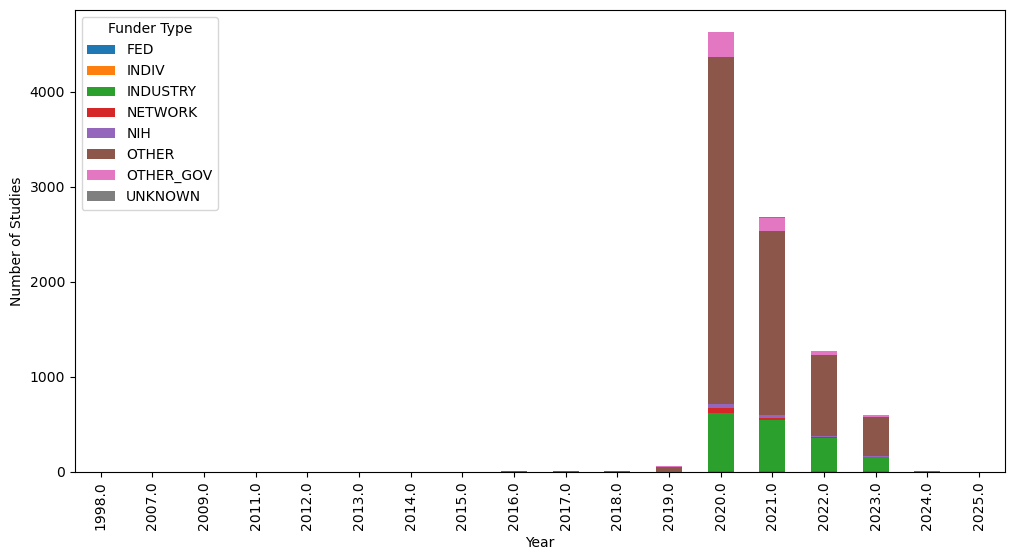

In [35]:
# Extract the year from Start Date and group by year and sponsor type
sponsorship_trends=df.groupby([df['Start Date'].dt.year, 'Funder Type']).size().unstack().fillna(0)
print(sponsorship_trends)

# Plot a stacked bar chart to visualize sponsorship trends
sponsorship_trends.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.legend(title='Funder Type', loc='upper left')
plt.show()

The analysis of sponsorship trends over time in COVID-19 clinical trials, categorized by "Funder Type," provides insights into the evolving landscape of funding sources for these trials. The data is organized by the start date of the trials.

Here's the interpretation of the trends:

1. **FED (Federal Government):** There are minimal or no clinical trials funded by the federal government before 2020. However, starting in 2020, there is a significant increase in the number of clinical trials sponsored by the federal government. This suggests that governments at various levels became more actively involved in funding COVID-19 research, likely due to the urgency of the pandemic.

2. **INDIV (Individual):** Individual sponsorship remains limited throughout the years, with only a few trials having individual sponsors. This indicates that most trials are not primarily funded by individual donors.

3. **INDUSTRY (Industry):** Industry-sponsored trials, which involve pharmaceutical and biotech companies, show a steady increase over time, with notable growth from 2020 onwards. The pharmaceutical industry became a major contributor to COVID-19 clinical trials, reflecting the significant effort and investment in developing treatments and vaccines.

4. **NETWORK:** Trials sponsored by research networks or consortia remain relatively limited but show a slight increase over time, particularly in the more recent years.

5. **NIH (National Institutes of Health):** The NIH-sponsored trials remain consistent over the years, but their count increases in 2020, possibly due to the government's heightened focus on COVID-19 research and funding.

6. **OTHER:** The "OTHER" category represents diverse sponsors, such as academic institutions, nonprofit organizations, and research institutions. The number of trials in this category increases significantly over time, with a substantial surge in 2020.

7. **OTHER_GOV (Other Government):** Clinical trials sponsored by other government agencies beyond the federal government are limited before 2020 but increase in number, especially in 2020 and 2021.

8. **UNKNOWN:** A few trials have sponsors with an "UNKNOWN" category, indicating that the source of funding is unclear or undisclosed.

**Interpretation:**

- The data shows a dramatic increase in COVID-19 clinical trials from 2020 onward, reflecting the global response to the pandemic.

- Government involvement, particularly at the federal level, expanded significantly in 2020, with substantial funding for COVID-19 research.

- The pharmaceutical industry played a vital role in sponsoring clinical trials, especially in 2020 and 2021, aligning with the race to develop vaccines and treatments.

- Academic and research institutions, along with various nonprofit organizations, also increased their involvement as sponsors in response to the pandemic.

- The "UNKNOWN" category underscores the importance of transparency in reporting sponsorship sources in clinical trials.

This analysis provides valuable insights into the changing landscape of COVID-19 clinical trial funding and highlights the collaborative efforts of governments, industries, and various organizations in the fight against the pandemic.

<h2> Gender Distribution </h2>

ALL       9029
FEMALE     232
MALE        67
Name: Sex, dtype: int64


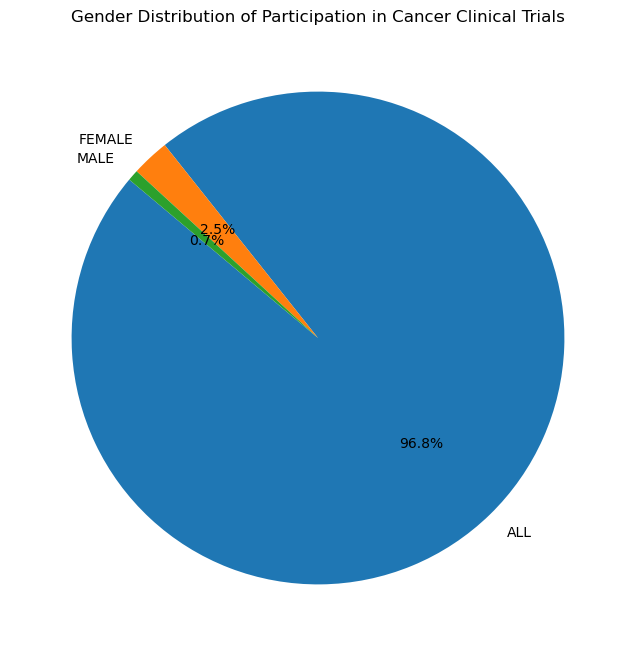

In [33]:
# Count the number of studiies with male and female participants
gender_distribution=df['Sex'].value_counts()
print(gender_distribution)

# Plot a pie chart for gender distribution
plt.figure(figsize=(8,8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Participation in Cancer Clinical Trials')
plt.show()

- **ALL (9029):** The majority of participants in COVID-19 clinical trials are categorized under "ALL," indicating that they may include individuals of all genders, including male and female participants. This approach aims to have a diverse representation in the trials.

- **FEMALE (232):** The "FEMALE" category represents a subset of participants specifically identified as female.

- **MALE (67):** The "MALE" category represents a subset of participants specifically identified as male.

**Interpretation:**

- The distribution of participants across "ALL," "FEMALE," and "MALE" categories indicates that the majority of clinical trials aim to include individuals of all genders. However, there is a higher count of female participants compared to male participants.

- Achieving a balanced gender representation in clinical trials is crucial for understanding the gender-specific effects and responses to COVID-19 and potential treatments. Efforts may be needed to increase the inclusion of males

<h2> Outcome Measures </h2>

In [4]:
# Count the occurrences of primary and secondary outcome measures
pry_outcomes=df['Primary Outcome Measures'].str.split('|').explode().str.strip().value_counts().head(10)
sec_outcomes=df['Secondary Outcome Measures'].str.split('|').explode().str.strip().value_counts().head(10)

In [5]:
print(pry_outcomes)
print('----------------------')
print(sec_outcomes)

Time from randomization to sustained recovery, Sustained recovery defined as being discharged from the index hospitalization, followed by being alive and home for 14 consecutive days prior to Day 90., Up to Day 90                                                                                                                                                                                                                                    7
Adverse reactions/events rate, Occurence of adverse reactions/events after vaccination, 28 days after vaccination                                                                                                                                                                                                                                                                                                                                        5
Adverse reactions/events rate, Occurence of adverse reactions/events after vaccination, 7 days after vaccination  

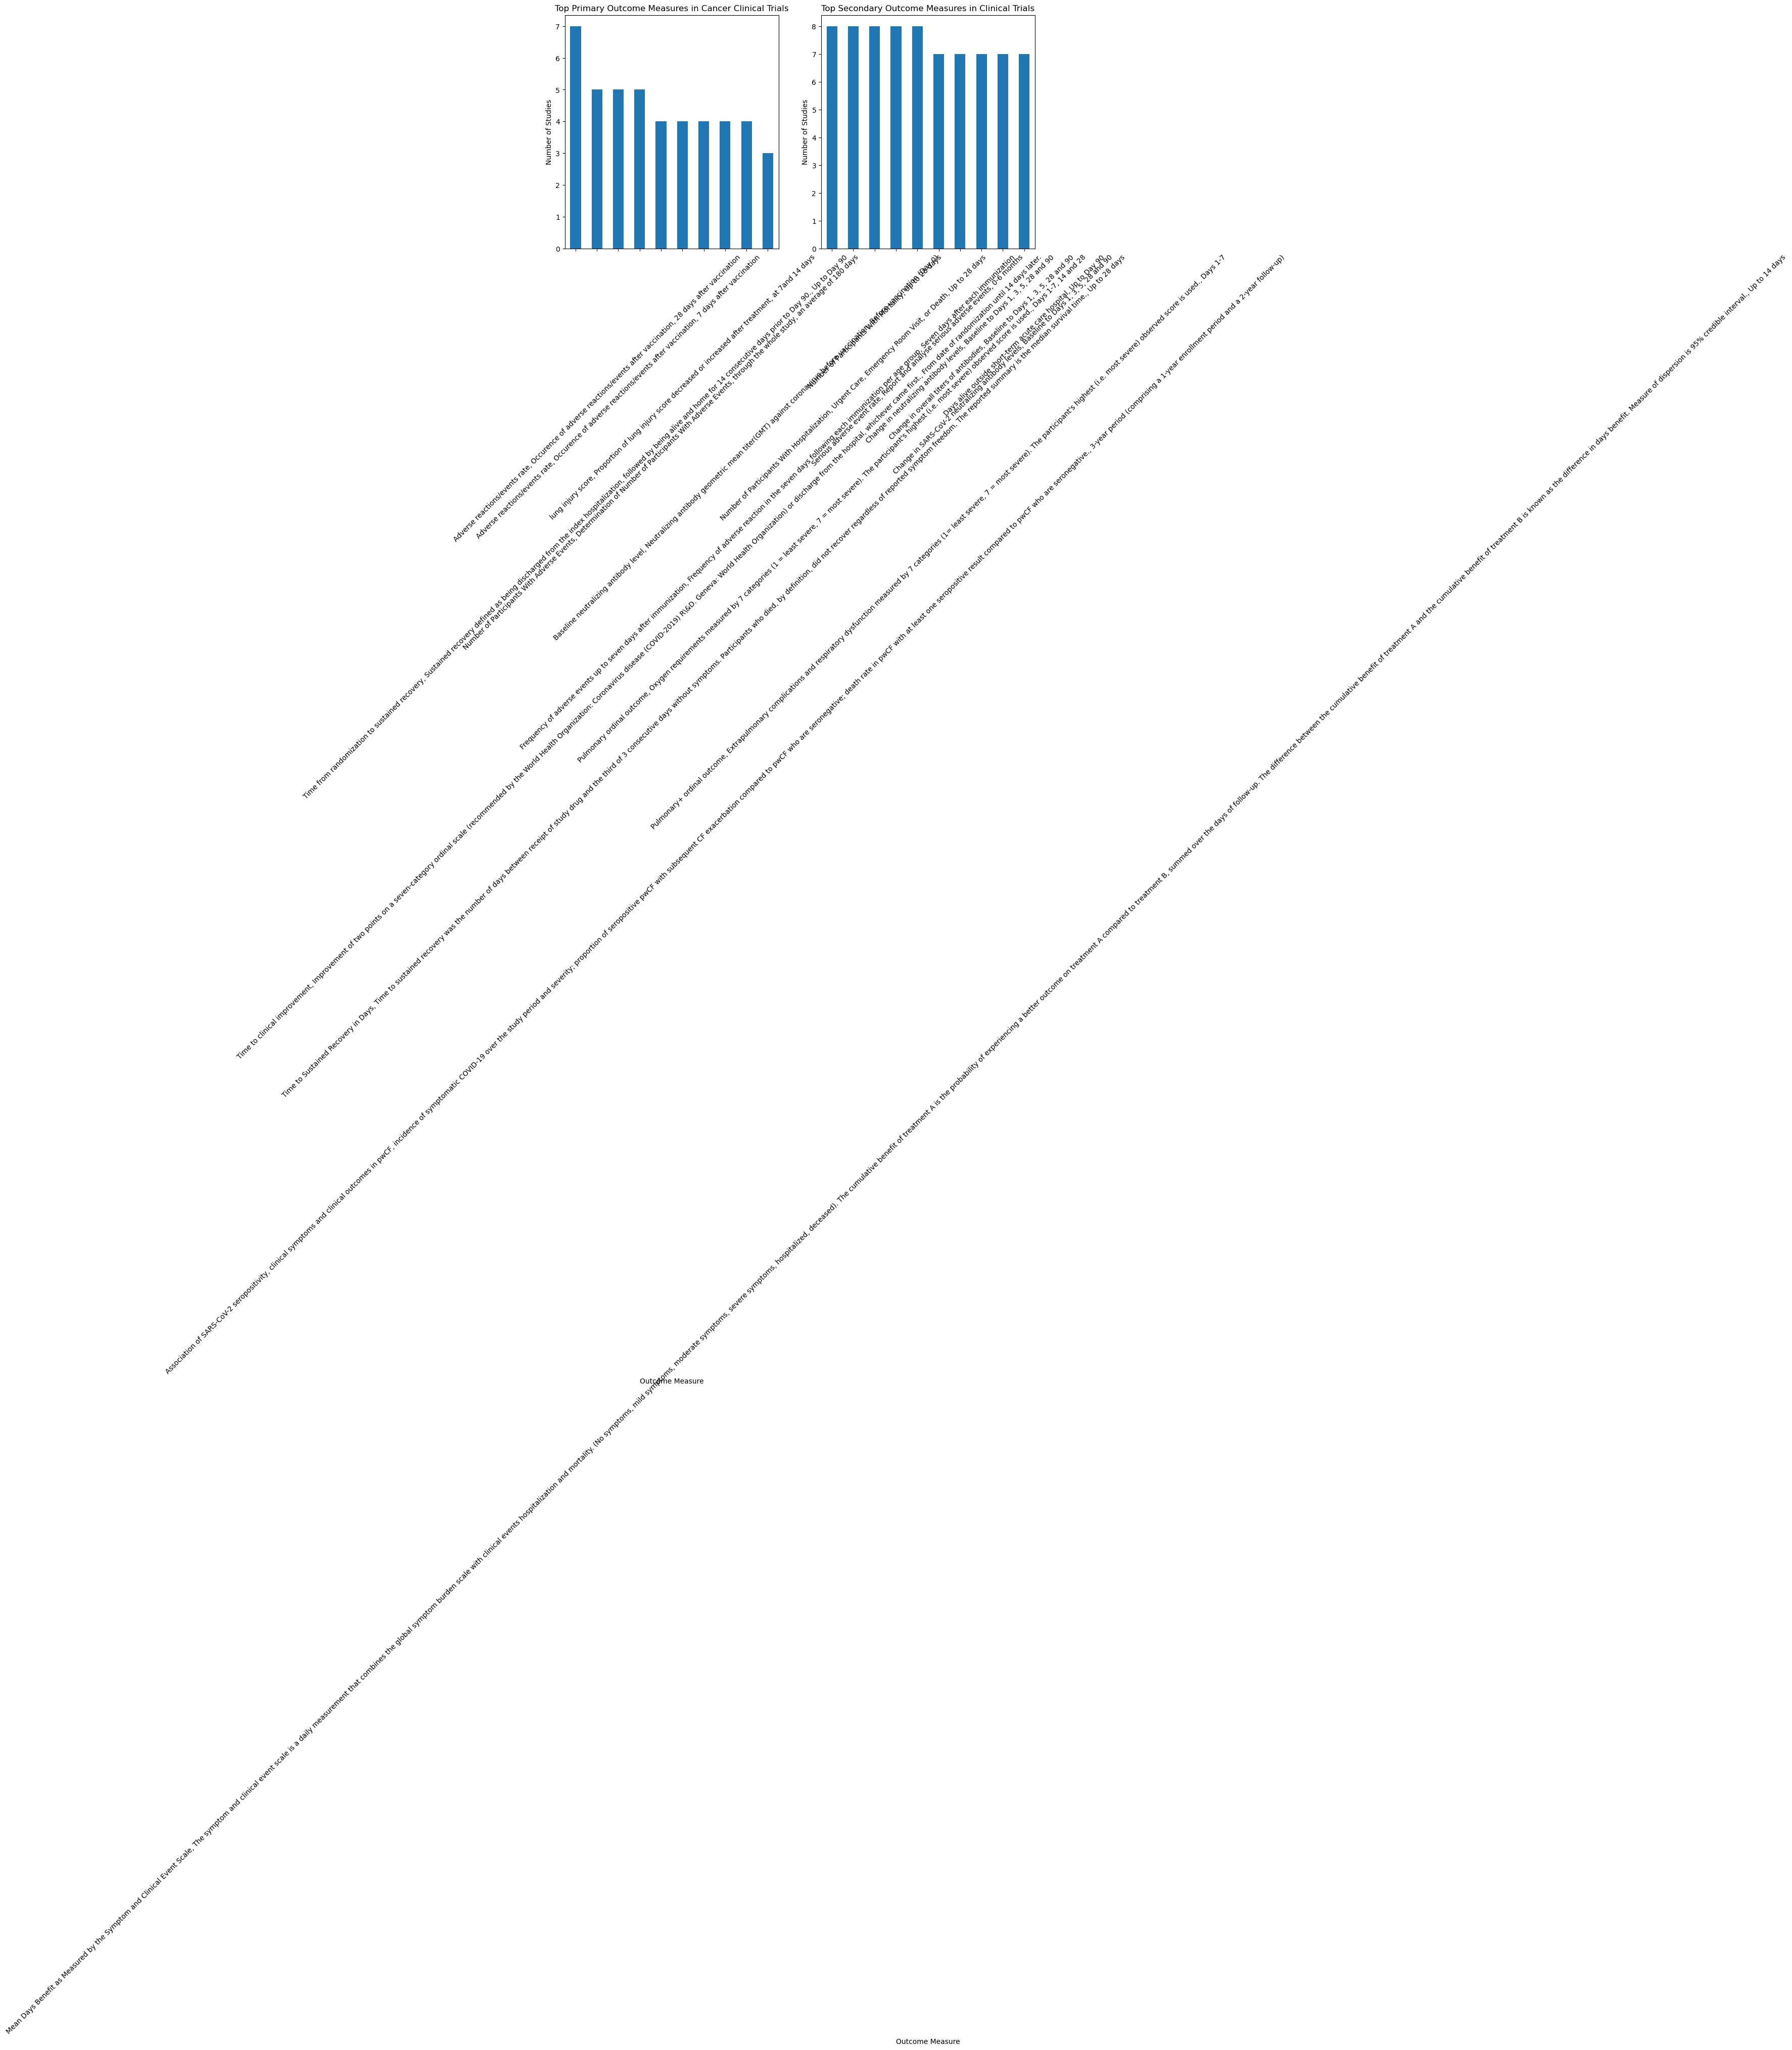

In [42]:
# Plot a bar chart for top outcome measures
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
pry_outcomes.plot(kind='bar')
plt.title('Top Primary Outcome Measures in Cancer Clinical Trials')
plt.xlabel('Outcome Measure')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sec_outcomes.plot(kind='bar')
plt.title('Top Secondary Outcome Measures in Clinical Trials')
plt.xlabel('Outcome Measure')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h2> Publication Trends </h2>

In [8]:
# Convert the date columns to datetime
df['First Posted'] = pd.to_datetime(df['First Posted'])
df['Last Update'] = pd.to_datetime(df['Last Update Posted'])

# Extract the publication year
df['Publication Year'] = df['First Posted'].dt.year

# Now I have the "Publication Year" column ready for analysis

2007       1
2011       1
2013       1
2014       1
2015       1
2016       4
2017       9
2018       5
2019      18
2020    4248
2021    2807
2022    1477
2023     769
Name: Publication Year, dtype: int64


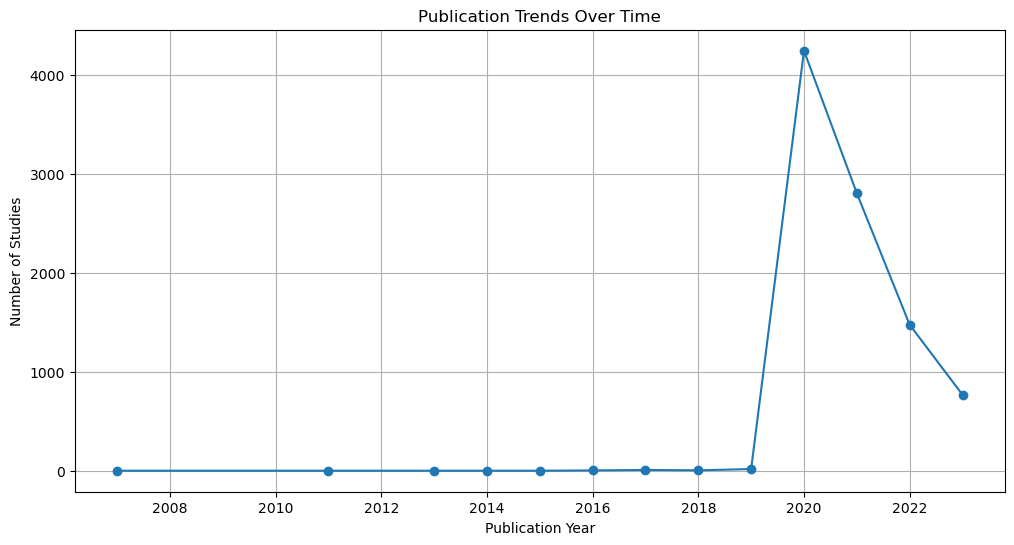

In [11]:
# Count the number of studies published each year
publication_counts = df['Publication Year'].value_counts().sort_index()
print(publication_counts)

# Visualize publication trends
plt.figure(figsize=(12, 6))
plt.plot(publication_counts.index, publication_counts.values, marker='o', linestyle='-')
plt.title('Publication Trends Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.show()


Before the Pandemic (2007-2017): There were occasional publications on COVID-19 before the pandemic began. The number of studies published during these years remained relatively low, with an average of less than 10 studies per year. This suggests that COVID-19 was not a major focus of research during this period.

Pandemic Onset and Surge (2018-2020): In 2019, as the COVID-19 pandemic emerged, the number of publications started to increase significantly. In 2020, there was a substantial surge in research and publications, with 4,248 studies published. This sharp increase is a clear reflection of the global impact of the pandemic, prompting researchers to study the virus, its transmission, treatment, and prevention.

Pandemic Response (2021-2023): The high publication volume continued in 2021, with 2,807 studies. In 2022 and 2023, there were still substantial numbers of publications (1,477 and 769, respectively). This sustained research activity indicates that COVID-19 remained a significant public health concern, and researchers continued to investigate the virus, its variants, and long-term effects.

The data shows a strong correlation between the emergence of the COVID-19 pandemic and the surge in research efforts. The global scientific community responded rapidly to the pandemic by conducting extensive research, leading to a wealth of knowledge about the virus, its variants, and potential interventions. These findings have been crucial for the development of vaccines, treatment strategies, and public health measures.